In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
# modify "path_to_homework", path of folder in drive, where you uploaded your homework files
path_to_ws = "/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/"
sys.path.append(path_to_ws)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import argparse
import os
from utils import get_config, _write_images
import torch
from data import create_dataset, create_dataloader
from models.networks import define_G
from data.util import tensor2img
import skimage.io as sio
import numpy as np

In [11]:
import numpy as np
import sys

input_directory = '/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/test_images/'
#  input_directory = './combined_images/'

dataset_text_dir = '/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/datasets/styleGAN2_generated/'
name = 'test_image_dataset'
f = open(dataset_text_dir+name + ".txt", "w")

for im in os.listdir(input_directory):
    f.write(input_directory+im+'\n')
f.close()

In [12]:

!sort "/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/datasets/styleGAN2_generated/test_image_dataset.txt" -o "/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/datasets/styleGAN2_generated/test_image_dataset.txt"

In [13]:
import numpy as np
import sys

input_directory = path_to_ws + 'data/var_9_predicted_test_masks/'
#  input_directory = './combined_images/'

dataset_text_dir = '/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/datasets/var_9_predicted_masks/'
name = 'var_9_predicted_test_masks'
f = open(dataset_text_dir+name + ".txt", "w")

for im in os.listdir(input_directory):
    f.write(input_directory+im+'\n')
f.close()

In [14]:

!sort "/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/datasets/var_9_predicted_masks/var_9_predicted_test_masks.txt" -o "/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/datasets/var_9_predicted_masks/var_9_predicted_test_masks.txt"

In [ ]:
# os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [5]:
config = path_to_ws + '/configs/predicted_test_masks.yaml'
output_folder = path_to_ws + '/outputs/predicted_masks/test_images_predicted/'
checkpoint = path_to_ws + '/outputs/celebahq-regular/checkpoints/latest_G.pth'

In [ ]:
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [10]:
! pip install -U PyYAML
import yaml

print(yaml.__version__)

     |████████████████████████████████| 276kB 10.9MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44619 sha256=b46f927bc57f93675f38034e890b030efc3173c5255cec4c344240b7463896bf
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


3.13


In [6]:
# Load experiment setting
config = get_config(config)

In [7]:
device = torch.device('cuda')
# Setup model and data loader
model = define_G(config).to(device)
model.load_state_dict(torch.load(checkpoint), strict=True)
model.eval()

InpaintingGenerator(
  (encoder): Sequential(
    (0): conv_block(
      (pad): ZeroPad2d(padding=(2, 2, 2, 2), value=0.0)
      (activation): ReLU()
      (conv): Conv2d(4, 64, kernel_size=(5, 5), stride=(1, 1))
    )
    (1): conv_block(
      (pad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      (norm): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (activation): ReLU()
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    )
    (2): conv_block(
      (pad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      (norm): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (activation): ReLU()
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    )
    (3): conv_block(
      (pad): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      (norm): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (activation): ReLU()
      (conv): Conv2d(128, 

In [15]:
import cv2
from google.colab.patches import cv2_imshow

def binary_white(input_im, input_dir, output_dir): 
    print(input_im)
    img = cv2.imread(input_dir+'/'+input_im, 0)
    img_bin = cv2.threshold(img, 10, 256, cv2.THRESH_BINARY)[1]
    # img_rev = cv2.bitwise(img_bin)
    # cv2_imshow(img_rev)
    print(output_dir)
    cv2.imwrite(output_dir + '/' + input_im, img_bin)

input_directory = input_directory
output_directory = input_directory
for im in os.listdir(input_directory):
    binary_white(im, input_directory, output_directory)

seed0058.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0972.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0049.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0997.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0919.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0277.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0294.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0455.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0433.png
/content/drive/Shareddrives/Advanced CV - Final Project/DMFN/data/var_9_predicted_test_masks/
seed0308.png
/content/drive/Shareddri

Loading the checkpoint for G [/content/drive/Shareddrives/Advanced CV - Final Project/DMFN//outputs/celebahq-regular/checkpoints/latest_G.pth] ...
Number of test images in [celeba-hq]: 20


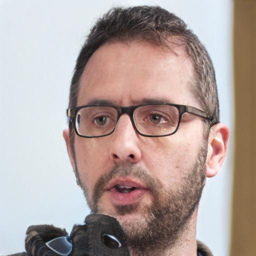

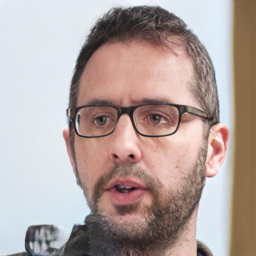

----------------------------------------------------------------------


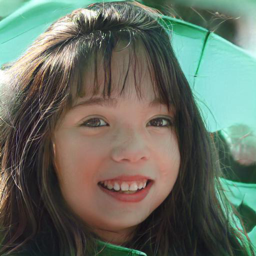

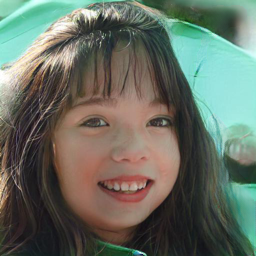

----------------------------------------------------------------------


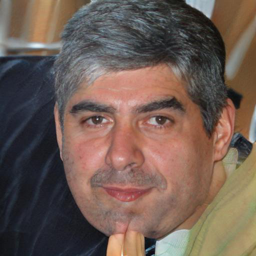

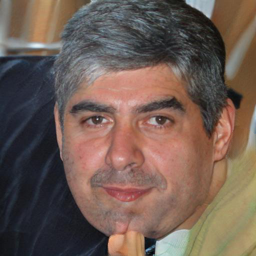

----------------------------------------------------------------------


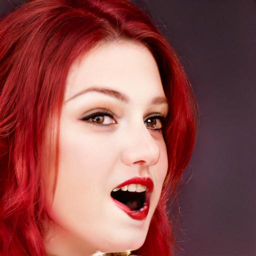

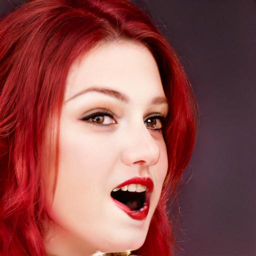

----------------------------------------------------------------------


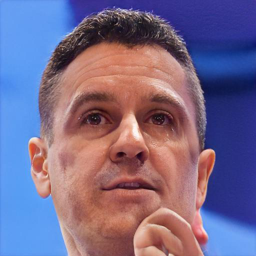

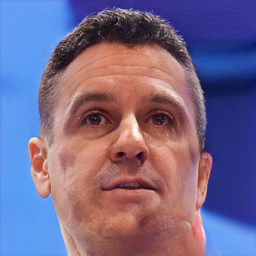

----------------------------------------------------------------------


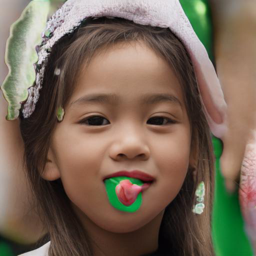

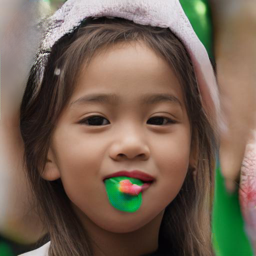

----------------------------------------------------------------------


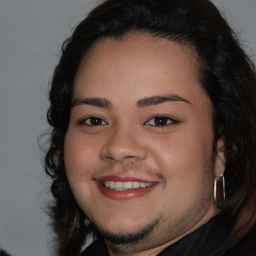

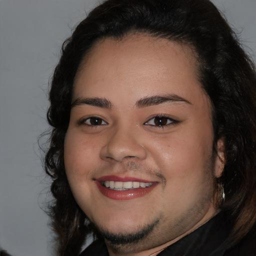

----------------------------------------------------------------------


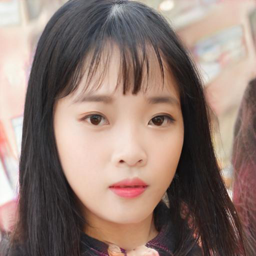

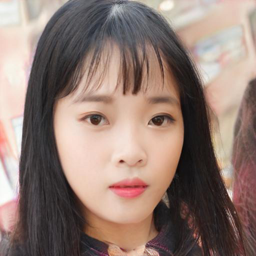

----------------------------------------------------------------------


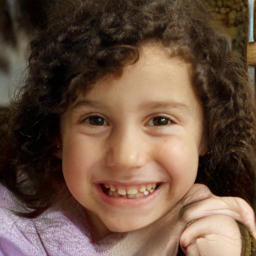

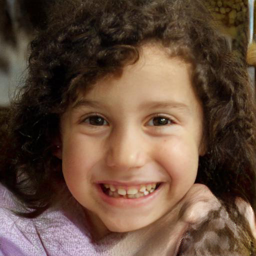

----------------------------------------------------------------------


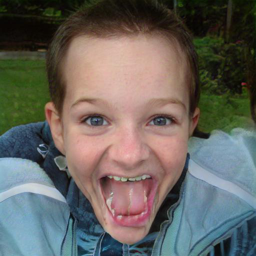

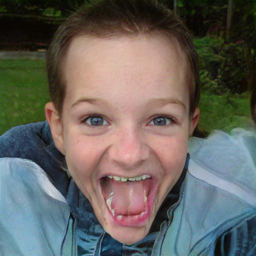

----------------------------------------------------------------------


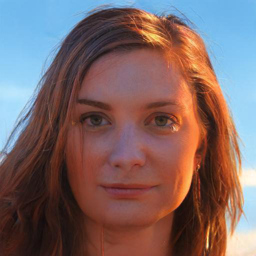

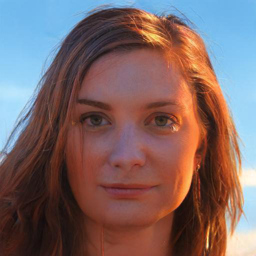

----------------------------------------------------------------------


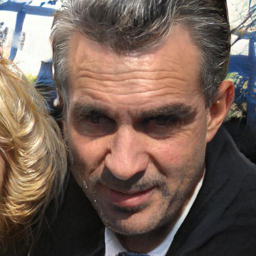

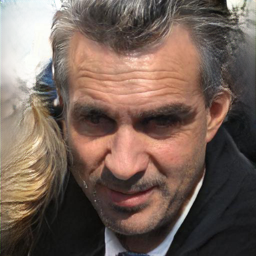

----------------------------------------------------------------------


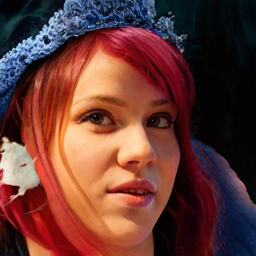

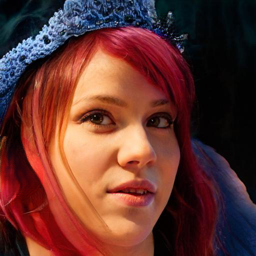

----------------------------------------------------------------------


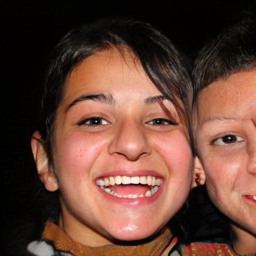

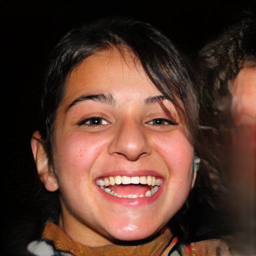

----------------------------------------------------------------------


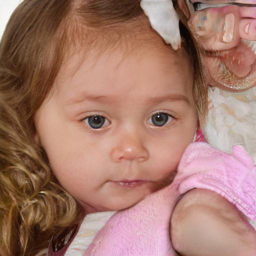

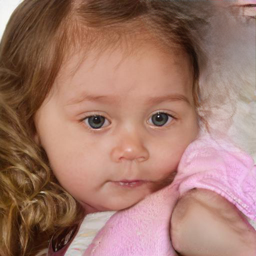

----------------------------------------------------------------------


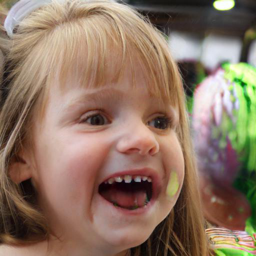

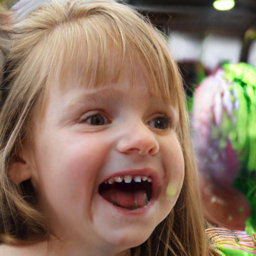

----------------------------------------------------------------------


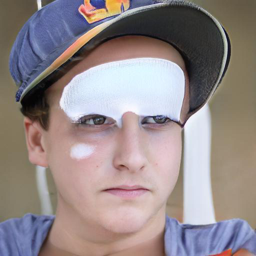

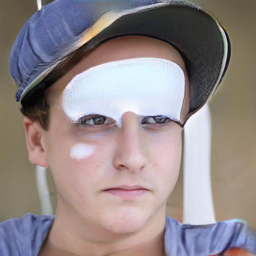

----------------------------------------------------------------------


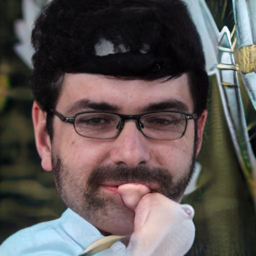

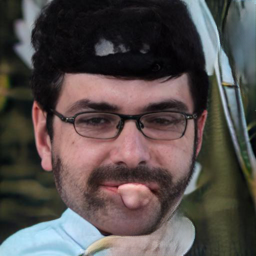

----------------------------------------------------------------------


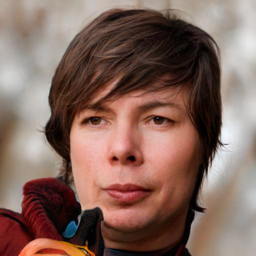

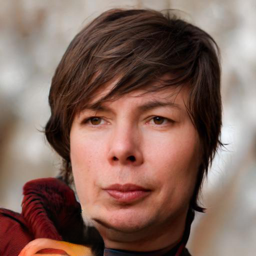

----------------------------------------------------------------------


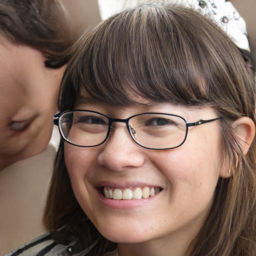

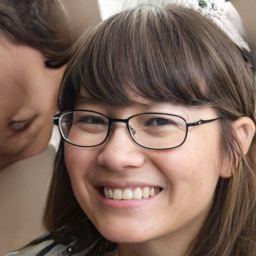

----------------------------------------------------------------------
End of testing.


In [16]:
from skimage import img_as_ubyte
from google.colab.patches import cv2_imshow
import torchvision.utils as vutils
import cv2
print('Loading the checkpoint for G [{:s}] ...'.format(checkpoint))

with torch.no_grad():
    dataset_opt = config['datasets']['test']
    test_set = create_dataset(dataset_opt)
    test_loader = create_dataloader(test_set, dataset_opt)
    print('Number of test images in [{:s}]: {:d}'.format(dataset_opt['name'], len(test_set)))

    # Start testing

    for index, test_data in enumerate(test_loader):
        v_input, v_output, v_original = [], [], []
        visual_images = []
        var_input, var_mask, var_original, img_paths = test_data['input'], test_data['mask'], test_data['target'], test_data['paths']

        var_input = var_input.to(device)
        var_mask = var_mask.to(device)
        var_original = var_original.to(device)
        var_output = var_mask.detach() * model(torch.cat([var_input, var_mask], dim=1)) + (1 - var_mask.detach()) * var_input.detach()
        
        v_input.append(var_input.detach()[0].float().cpu())
        v_output.append(var_output.detach()[0].float().cpu())
        v_original.append(var_original.detach()[0].float().cpu())

        visual_images.extend(v_original)
        visual_images.extend(v_input)
        visual_images.extend(v_output)


        _write_images(visual_images, 1, '%s/%s' % (output_folder + '/combined/', img_paths[0].split('/')[-1]))
        saved_mask = (var_mask.detach()[0].float().cpu().numpy().squeeze() * 255).round().astype(np.uint8)
        saved_input = (var_mask.detach()[0].float().cpu() + ((v_original[0] + 1) / 2)).numpy().squeeze().transpose(1, 2, 0).clip(0, 1)
        saved_output = tensor2img(v_output)
        saved_original = tensor2img(v_original)

        sio.imsave(os.path.join(output_folder, 'mask', img_paths[0].split('/')[-1].split('.')[0] + '.png'), img_as_ubyte(saved_mask), check_contrast=False)
        sio.imsave(os.path.join(output_folder, 'input', img_paths[0].split('/')[-1]), img_as_ubyte(saved_input), check_contrast=False)
        sio.imsave(os.path.join(output_folder, 'output', img_paths[0].split('/')[-1]), img_as_ubyte(saved_output[0]), check_contrast=False)
        sio.imsave(os.path.join(output_folder, 'original', img_paths[0].split('/')[-1]), img_as_ubyte(saved_original[0]), check_contrast=False)

        '''
        print(visual_images)
        image_tensor = torch.stack(visual_images, dim=0)
        image_grid = vutils.make_grid(image_tensor, 1, padding=0, normalize=True)
        image_grid = image_grid.numpy()
        image_grid = np.transpose(image_grid, (1,2,0))
        '''
        im_rgb_ori = cv2.cvtColor(saved_original[0], cv2.COLOR_BGR2RGB)
        im_rgb_out = cv2.cvtColor(saved_output[0], cv2.COLOR_BGR2RGB)
        cv2_imshow(im_rgb_ori)
        cv2_imshow(im_rgb_out)
        print(70*'-')

print('End of testing.')


In [ ]:
# check an image out!
input_dir = output_folder +'/combined/'
image = 'seed0066.png'
img = cv2.imread(input_dir+'/'+input_im, 0)
cv2_imshow(img_rev)

NameError: ignored